In [91]:
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import time
import cv2 

In [125]:
data = np.load('twri_rgb_6832_cotton_64x64_9_02.npy')

In [116]:
data.shape

(6832, 64, 64, 3)

In [117]:
output = []
for index,imgarray in enumerate(data):
  img = Image.fromarray(imgarray.astype('uint8'), 'RGB')
  pixels = list(img.getdata())
  red = green = blue = 0
  for r, g, b in pixels:
        red += r
        green += g
        blue += b
  num_pixels = len(pixels)
  red_ratio = red/ (num_pixels * 255)
  green_ratio = green / (num_pixels * 255)
  blue_ratio = blue / (num_pixels * 255)
  excessGreen = 2*green_ratio - (red_ratio + blue_ratio)
  output.append({
        "ImageIndex": index,
        "Red":red_ratio,
        "Green":green_ratio,
        "blue":blue_ratio,
        "ExGI":excessGreen
  })
df = pd.DataFrame(output)
df.to_csv('datasetFeatures.csv', index=False)

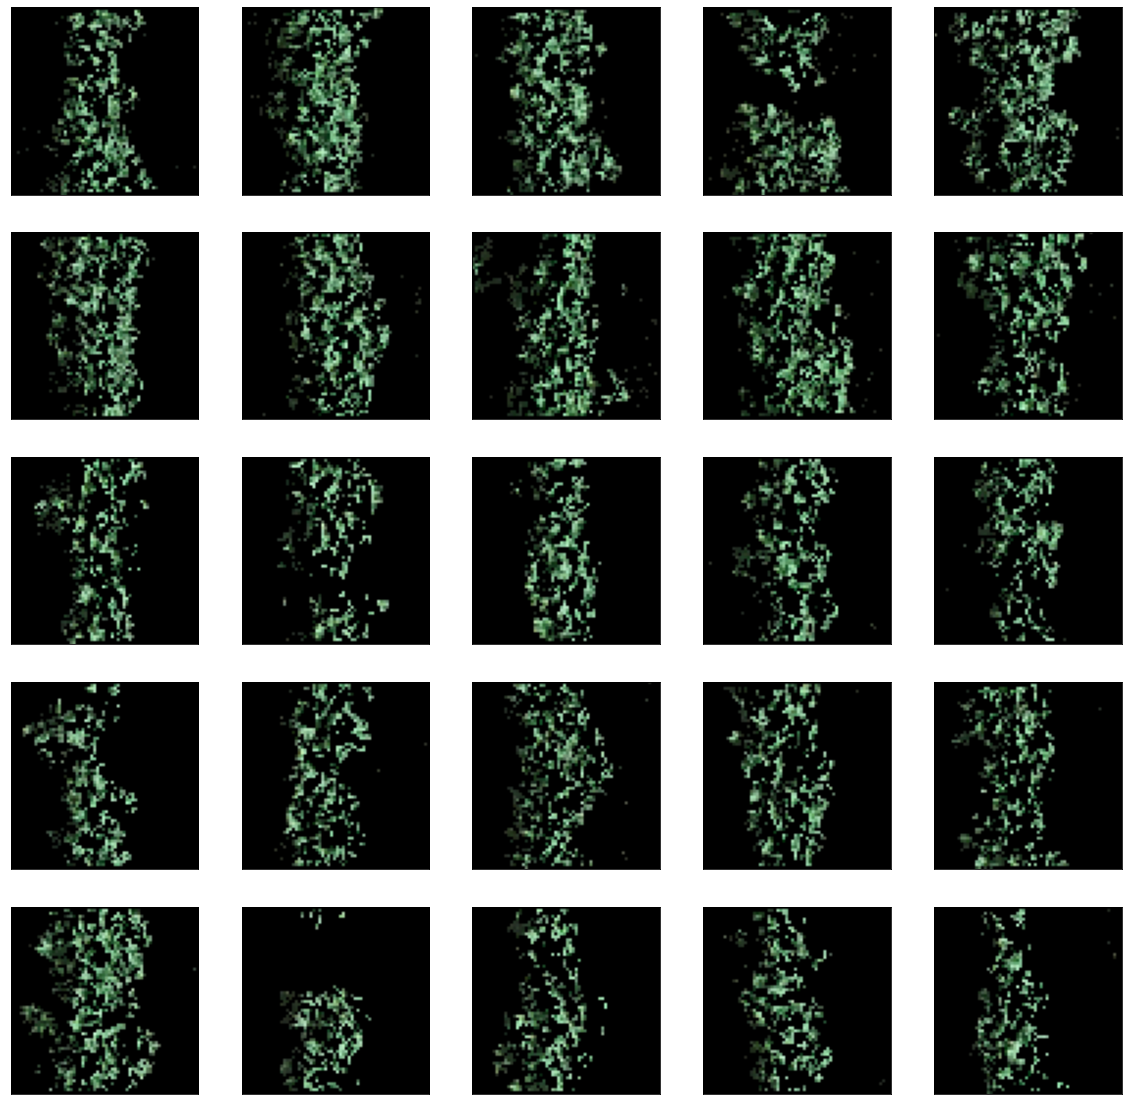

In [120]:

# Array pour stocker les images segmentées
CC_images = np.zeros_like(data)

# Définir les limites de la couleur verte en HSV
lower_green = np.array([35, 40, 40])
upper_green = np.array([70, 255, 255])

# Parcourir les images
for index, imgarray in enumerate(data):
    # S'assurer que l'image est de type uint8
    imgarray_uint8 = imgarray.astype(np.uint8)
    
    # Convertir l'image RGB en HSV
    hsv_image = cv2.cvtColor(imgarray_uint8, cv2.COLOR_RGB2HSV)
    
    # Créer un masque pour isoler les pixels verts
    mask = cv2.inRange(hsv_image, lower_green, upper_green)
    
    # Appliquer le masque à l'image originale
    CC_images[index] = cv2.bitwise_and(imgarray_uint8, imgarray_uint8, mask=mask)

# Afficher les images segmentées
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(CC_images[i].astype('uint8'))
plt.show()


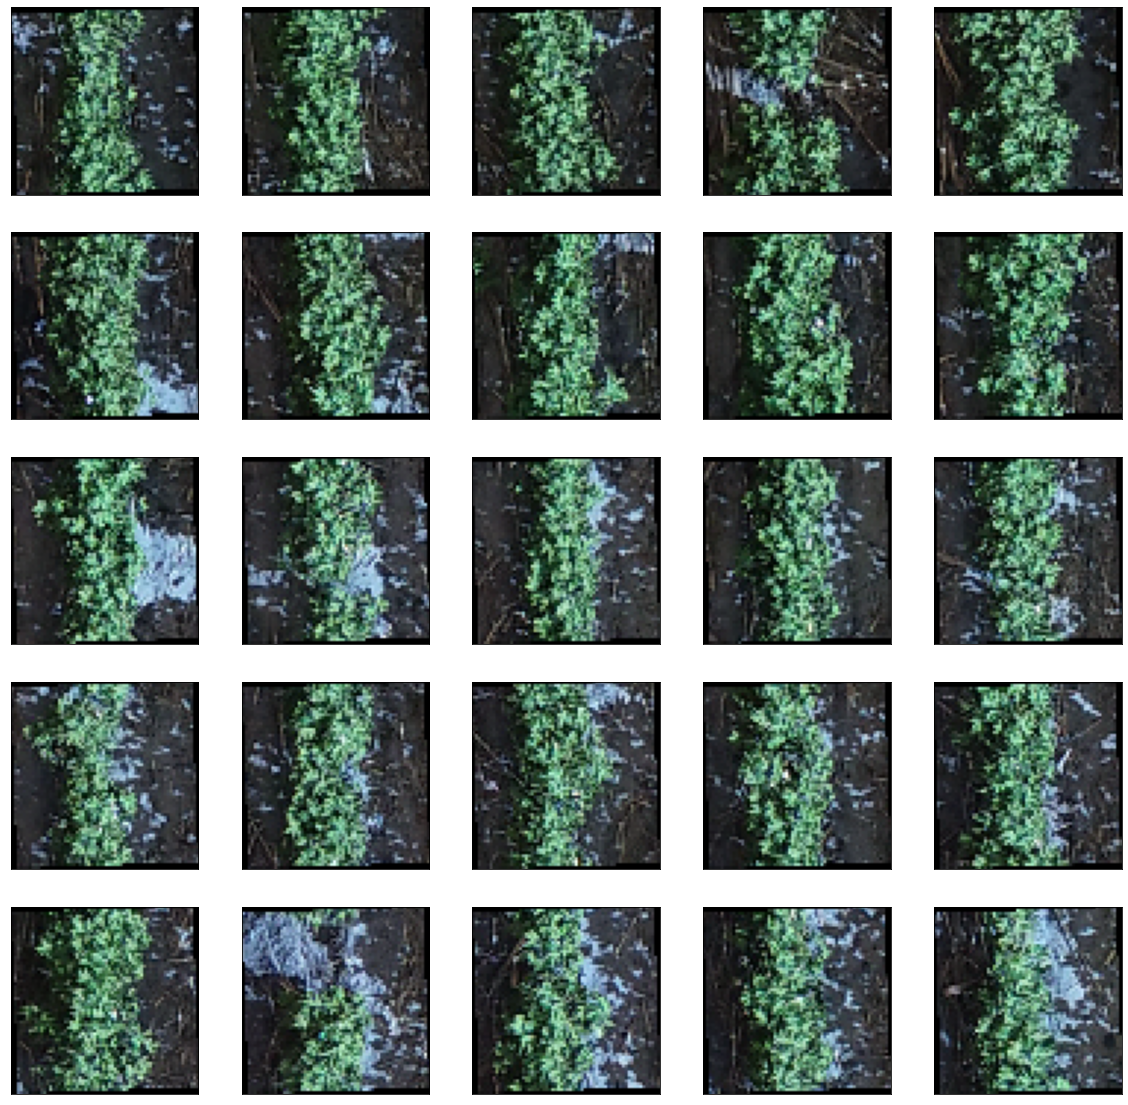

In [109]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i]/255)
plt.show()

In [123]:

csv_file_path = 'datasetFeatures.csv'
df = pd.read_csv(csv_file_path)
canopycoverData = []
for image in CC_images:
  cpt_canopy_cells = 0
  cpt_not_canopy = 0
  img = Image.fromarray(image.astype('uint8'), 'RGB')
  pixels = list(img.getdata())
  for r,g,b in pixels:
    if [r,g,b] != [0,0,0]:
      cpt_canopy_cells += 1
    else:
      cpt_not_canopy += 1
  canopycoverData.append(cpt_canopy_cells/(cpt_canopy_cells+cpt_not_canopy))
df['CanopyCover'] = canopycoverData
df.to_csv(csv_file_path, index=False)

In [128]:
first_image_array = data[21]

# Convert the first image array to a PIL Image
first_image = Image.fromarray(first_image_array.astype('uint8'), 'RGB')

# Save the first image as a PNG file
first_image.save('first_image.png')